In [1]:
!pip install translate

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Pumadataset_cleaned.csv')
data.head()

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,lemmatized_text,lemmatized_tokens
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...,"['future', 'pumas', 'the', 'time', 'is', 'here...","['future', 'pumas', 'time', 'offers', 'availab...",future pumas time offers available join jcp fa...,future puma time offer available join jcp fami...,"['future', 'puma', 'time', 'offer', 'available..."
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...,"['today', 'we', 'unbox', 'the', 'fastroid', 'n...","['today', 'unbox', 'fastroid', 'nitro', 'sneak...",today unbox fastroid nitro sneaker available e...,today unbox fastroid nitro sneaker available e...,"['today', 'unbox', 'fastroid', 'nitro', 'sneak..."
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...,"['the', 'new', 'astyle', 'highend', 'helicopte...","['new', 'astyle', 'highend', 'helicopter', 'co...",new astyle highend helicopter controllers pro ...,new astyle highend helicopter controller pro f...,"['new', 'astyle', 'highend', 'helicopter', 'co..."
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...,"['the', 'puma', 'suede', 'is', 'a', 'classic',...","['puma', 'suede', 'classic', 'style', 'crafted...",puma suede classic style crafted rich suede fe...,puma suede classic style crafted rich suede fe...,"['puma', 'suede', 'classic', 'style', 'crafted..."
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...,"['are', 'you', 'looking', 'for', 'a', 'clinica...","['looking', 'clinical', 'modular', 'soundproof...",looking clinical modular soundproof booth puma...,looking clinical modular soundproof booth puma...,"['looking', 'clinical', 'modular', 'soundproof..."


In [4]:
#from translate import Translator

#def convert_eng(tweet):
   # translator=Translator(to_lang="en", from_lang="id")
    #translation=translator.translate(tweet)
    #return translation

#data['tweet_english']=data['normalized_text'].apply(convert_eng)

In [5]:
#DATA PREPROCESSING
data= pd.DataFrame(data[['lemmatized_text']])
data.head(5)

,lemmatized_text
0,future puma time offer available join jcp fami...
1,today unbox fastroid nitro sneaker available e...
2,new astyle highend helicopter controller pro f...
3,puma suede classic style crafted rich suede fe...
4,looking clinical modular soundproof booth puma...


In [6]:
data.to_csv('Pumadataset_cleaned2.csv')
data=pd.read_csv('Pumadataset_cleaned2.csv')
data= pd.DataFrame(data[['lemmatized_text']])
data.head()

,lemmatized_text
0,future puma time offer available join jcp fami...
1,today unbox fastroid nitro sneaker available e...
2,new astyle highend helicopter controller pro f...
3,puma suede classic style crafted rich suede fe...
4,looking clinical modular soundproof booth puma...


In [7]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

# CLASSIFICATION USING TEXT BLOB

In [8]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
data_tweet=list(data['lemmatized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i, tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet)
    polarities+=analysis.polarity

    if analysis.sentiment.polarity>0.0:
        total_positive+=1
        status.append('Positive')
    elif analysis.sentiment.polarity==0.0:
        total_neutral+=1
        status.append('Neutral')
    else:
        total_negative+=1
        status.append('Negative')

    total+=1

print(f'Data Analysis:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data: {total}')

Data Analysis:
Positive=8061
Neutral=3761
Negative=2009

Total Data: 13831


In [10]:
data['Classification']=status
data

,lemmatized_text,Classification
0,future puma time offer available join jcp fami...,Positive
1,today unbox fastroid nitro sneaker available e...,Positive
2,new astyle highend helicopter controller pro f...,Positive
3,puma suede classic style crafted rich suede fe...,Positive
4,looking clinical modular soundproof booth puma...,Positive
...,...,...
13826,check puma unisex redeem profoam running shoe ...,Negative
13827,check new puma carina leather woman shoe white...,Positive
13828,check new puma retaliate tongue men running sh...,Positive
13829,check new puma retaliate tongue men running sh...,Negative


# VISUALIZATION

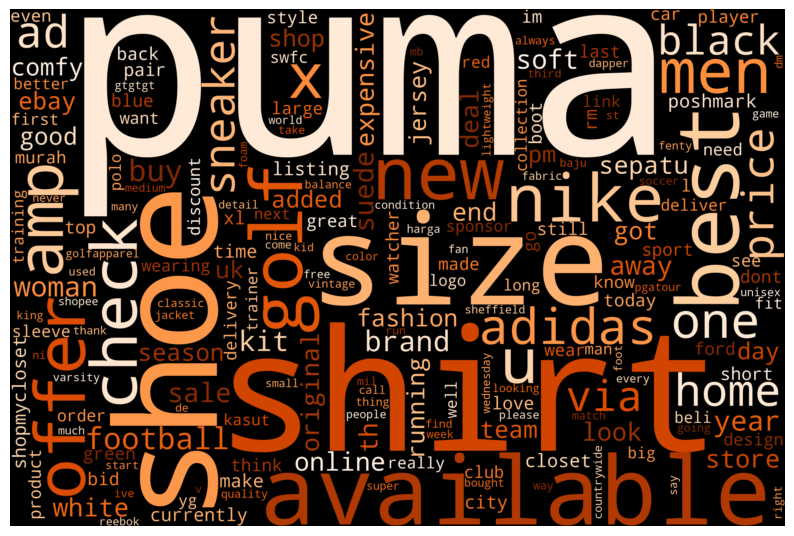

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordclud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words=' '.join([tweets for tweets in data['lemmatized_text']])

wordcloud=WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Oranges_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud(wordcloud)

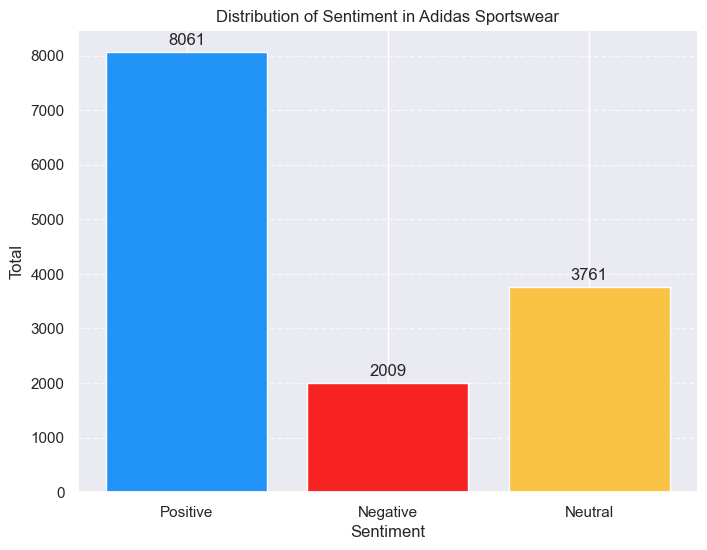

In [13]:
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

# CLASSIFICATION USING NAIVE BAYES

In [14]:
data

,lemmatized_text,Classification
0,future puma time offer available join jcp fami...,Positive
1,today unbox fastroid nitro sneaker available e...,Positive
2,new astyle highend helicopter controller pro f...,Positive
3,puma suede classic style crafted rich suede fe...,Positive
4,looking clinical modular soundproof booth puma...,Positive
...,...,...
13826,check puma unisex redeem profoam running shoe ...,Negative
13827,check new puma carina leather woman shoe white...,Positive
13828,check new puma retaliate tongue men running sh...,Positive
13829,check new puma retaliate tongue men running sh...,Negative


In [15]:
#dataset=data.drop([''],axis=1, inplace=False)
dataset=[tuple(x) for x in data.to_records(index=False)]

In [16]:
import random

set_positive=[]
set_negative=[]
set_neutral=[]

for n in dataset:
    if(n[1]=='Positive'):
        set_positive.append(n)
    elif(n[1]=='Negative'):
        set_negative.append(n)
    else:
        set_neutral.append(n)

set_positive=random.sample(set_positive, k=int(len(set_positive)/2))
set_negative=random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral=random.sample(set_neutral, k=int(len(set_neutral)/2))

train=set_positive+set_negative+set_neutral

train_set=[]

for n in train:
    train_set.append(n)

In [17]:
from textblob.classifiers import NaiveBayesClassifier
cl=NaiveBayesClassifier(train_set)
print("Accuracy Test: ",cl.accuracy(dataset))


Accuracy Test:  0.8376834646807896


In [18]:
#Labeling
data_tweet=list(data['lemmatized_text'])
polarities=0

status=[]
total_positive=total_negative=total_neutral=total=0

for i,tweet in enumerate(data_tweet):
    analysis=TextBlob(tweet,classifier=cl)

    if analysis.classify()=='Positive':
        total_positive+=1
    elif analysis.classify()=='Neutral':
        total_neutral+=1
    else:
        total_negative+=1

    status.append(analysis.classify())
    total+=1

print(f'\nAnalysis Data:\nPositive={total_positive}\nNeutral={total_neutral}\nNegative={total_negative}')
print(f'\nTotal Data:{total}')


Analysis Data:
Positive=8971
Neutral=3651
Negative=1209

Total Data:13831


In [20]:
status= pd.DataFrame({"NaiveBayes": status})
data['NaiveBayes_classification']=status

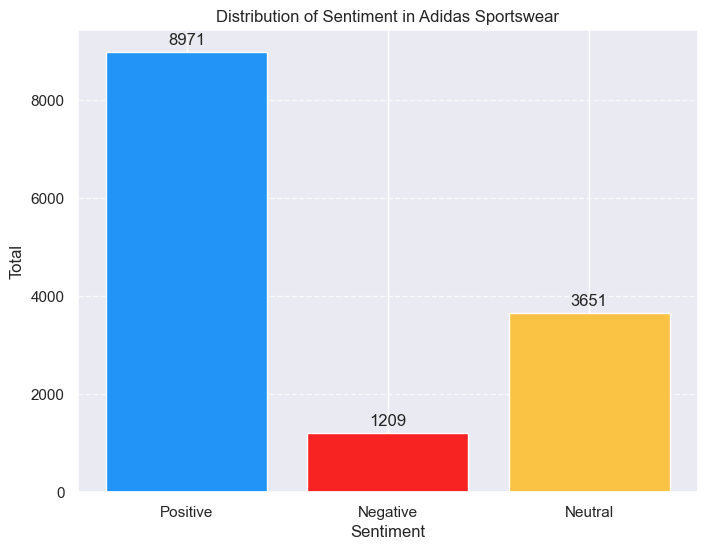

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels=['Positive','Negative','Neutral']
counts=[total_positive, total_negative, total_neutral]

def show_bar_chart(labels, counts, title):
    fig, ax=plt.subplots(figsize=(8,6))
    bars=ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

    for bar,count in zip(bars, counts):
        height=bar.get_height()
        ax.annotate(f'{count}',xy=(bar.get_x()+bar.get_width()/2,height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center',va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Total')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels,counts, "Distribution of Sentiment in Adidas Sportswear")

In [22]:
data

,lemmatized_text,Classification,NaiveBayes_classification
0,future puma time offer available join jcp fami...,Positive,Positive
1,today unbox fastroid nitro sneaker available e...,Positive,Positive
2,new astyle highend helicopter controller pro f...,Positive,Positive
3,puma suede classic style crafted rich suede fe...,Positive,Positive
4,looking clinical modular soundproof booth puma...,Positive,Positive
...,...,...,...
13826,check puma unisex redeem profoam running shoe ...,Negative,Neutral
13827,check new puma carina leather woman shoe white...,Positive,Positive
13828,check new puma retaliate tongue men running sh...,Positive,Positive
13829,check new puma retaliate tongue men running sh...,Negative,Positive


In [26]:
data_eval=[tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n)>=4:
        if n[2]!=n[3]:
            print(f'Text:{n[0]}\nClassifier:{n[2]}\nClassifier Bayes: {n[3]}\n')
        else:
            print("Tuples don't have enough elements.")